In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
import numpy as np

In [3]:
#read in data
df=pd.read_csv('data/parkinsons_updrsdata.csv')
print(df.head())
print(df.shape)
unique_users = df['subject#'].unique()
print(unique_users)

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

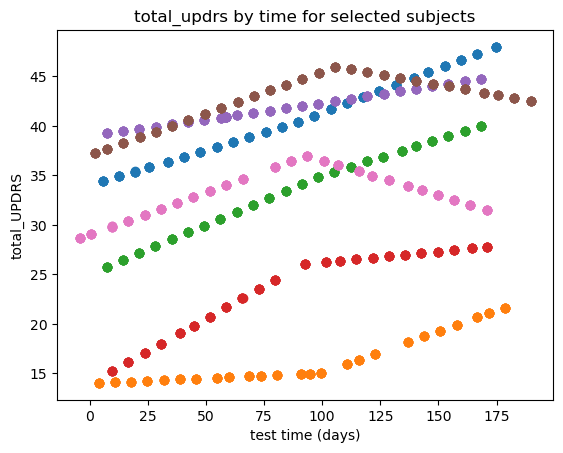

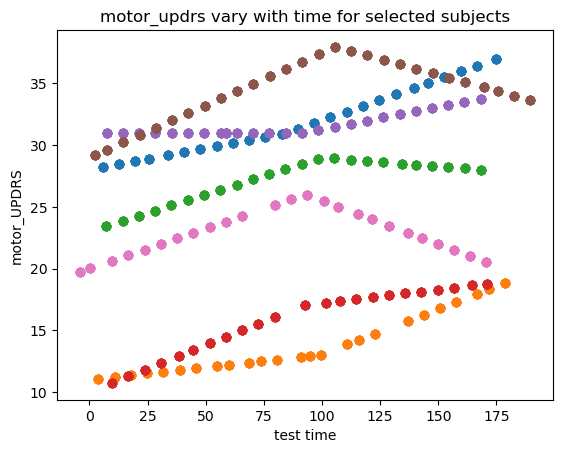

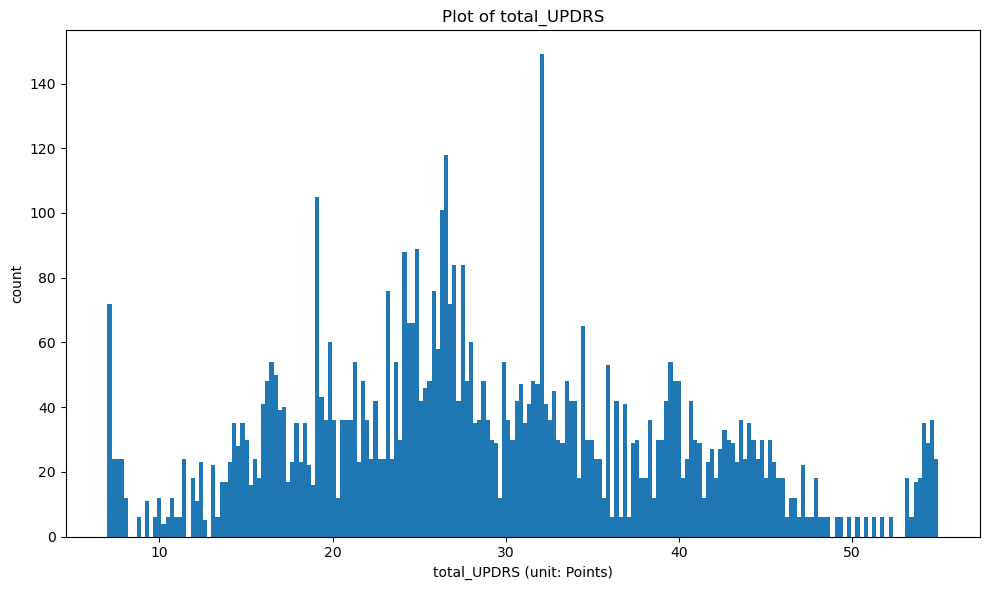

In [8]:
# target and time? imputed measurement
# pick one target?
for i in [1, 2, 3, 4, 5, 41, 42]:
    userone = df[df['subject#'] ==i]
    plt.scatter(userone['test_time'], userone['total_UPDRS'])
    plt.xlabel('test time (days)')
    plt.ylabel('total_UPDRS')
    plt.title('total_updrs by time for selected subjects')
    plt.savefig('total_UPDRS(unit: Points)', dpi=300) 
plt.show()

for i in [1, 2, 3, 4, 5, 41, 42]:
    userone = df[df['subject#'] ==i]
    plt.scatter(userone['test_time'], userone['motor_UPDRS'])
    plt.xlabel('test time')
    plt.ylabel('motor_UPDRS')
    plt.title('motor_updrs vary with time for selected subjects')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['total_UPDRS'], bins=200)
plt.xlabel('total_UPDRS (unit: Points)')
plt.ylabel('count')
plt.title('Plot of total_UPDRS')
plt.tight_layout()
plt.savefig('total_UPDRS.png', dpi=600, bbox_inches='tight')

#plt.semilogx()

In [4]:
print(df.dtypes)

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


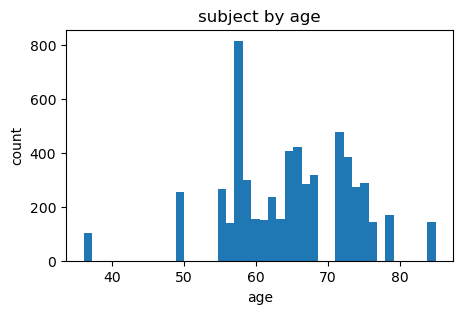

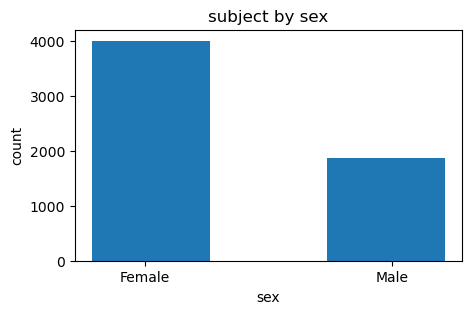

In [15]:
plt.figure(figsize=(5, 3))
plt.hist(df['age'], bins=42)
plt.xlabel("age")
plt.ylabel('count')
plt.title('subject by age')
plt.show()


plt.figure(figsize=(5, 3))
plt.hist(df['sex'], bins=3)
plt.xlabel("sex")
plt.ylabel('count')
plt.title('subject by sex')
plt.xticks([0.15, 0.85], ['Female', 'Male'])
plt.show()

In [6]:
print(df.columns)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


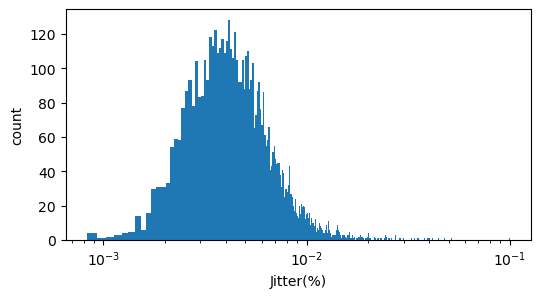

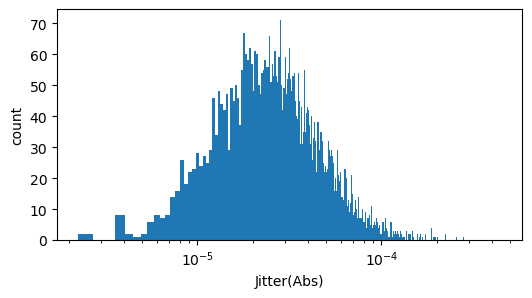

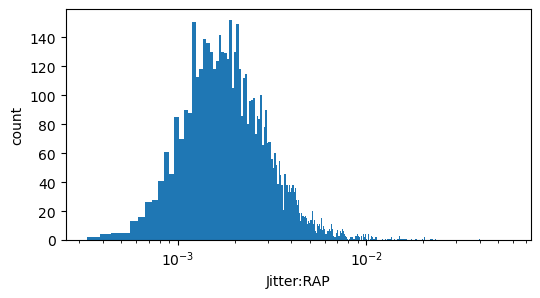

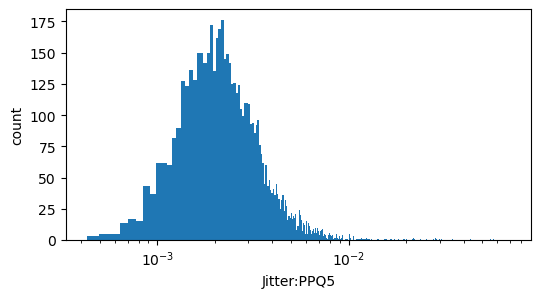

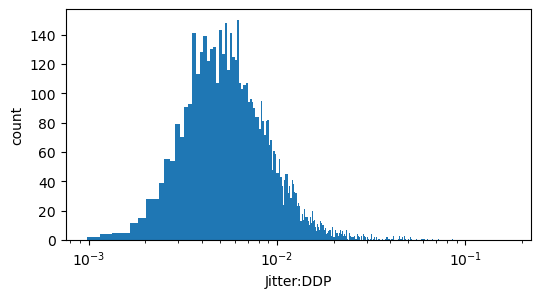

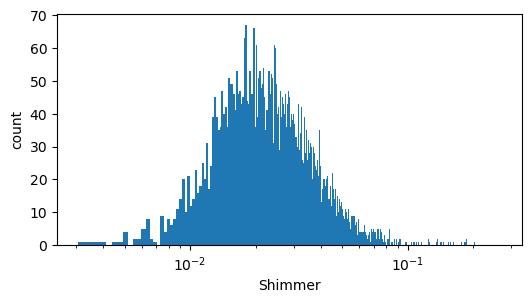

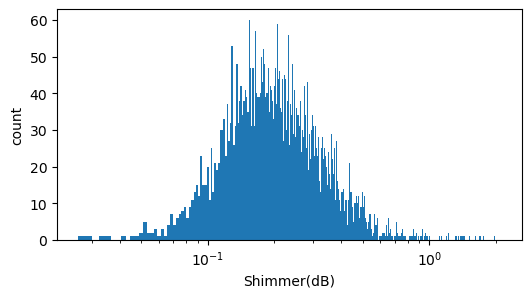

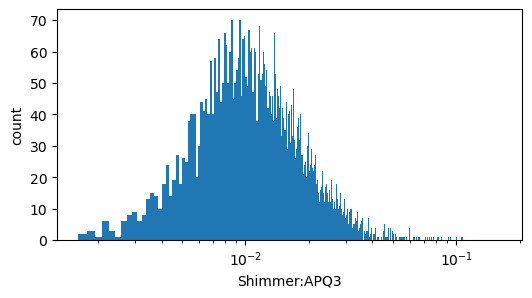

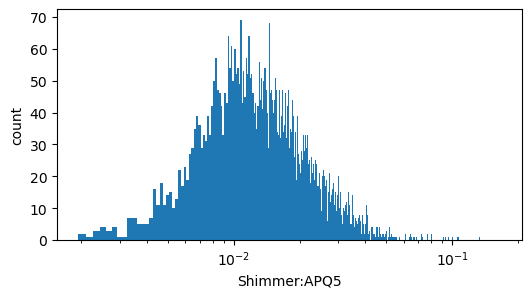

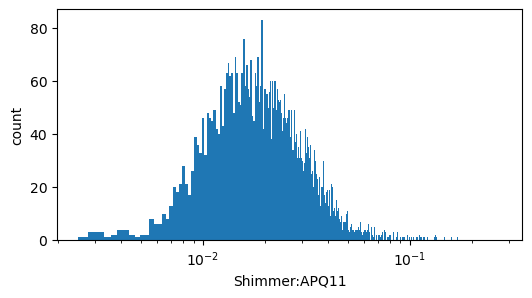

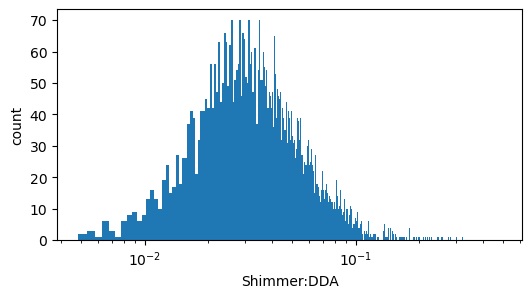

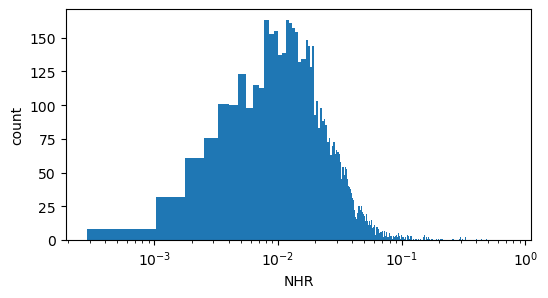

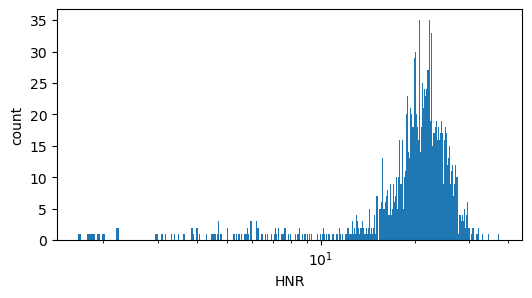

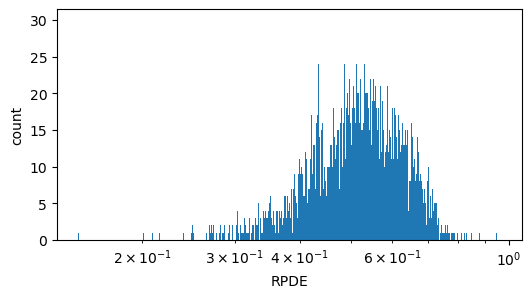

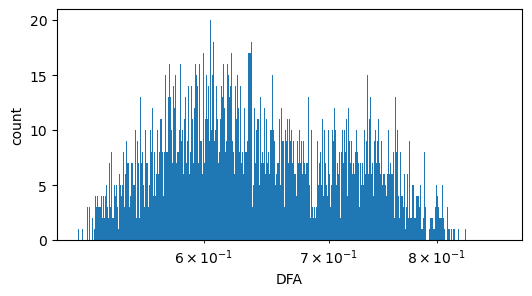

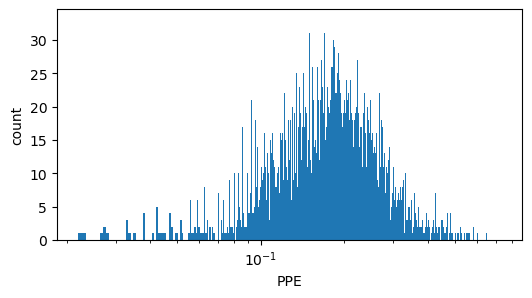

In [8]:
for i in ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']:
        plt.figure(figsize=(6, 3))
        plt.hist(df[i], bins=1000)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.semilogx()

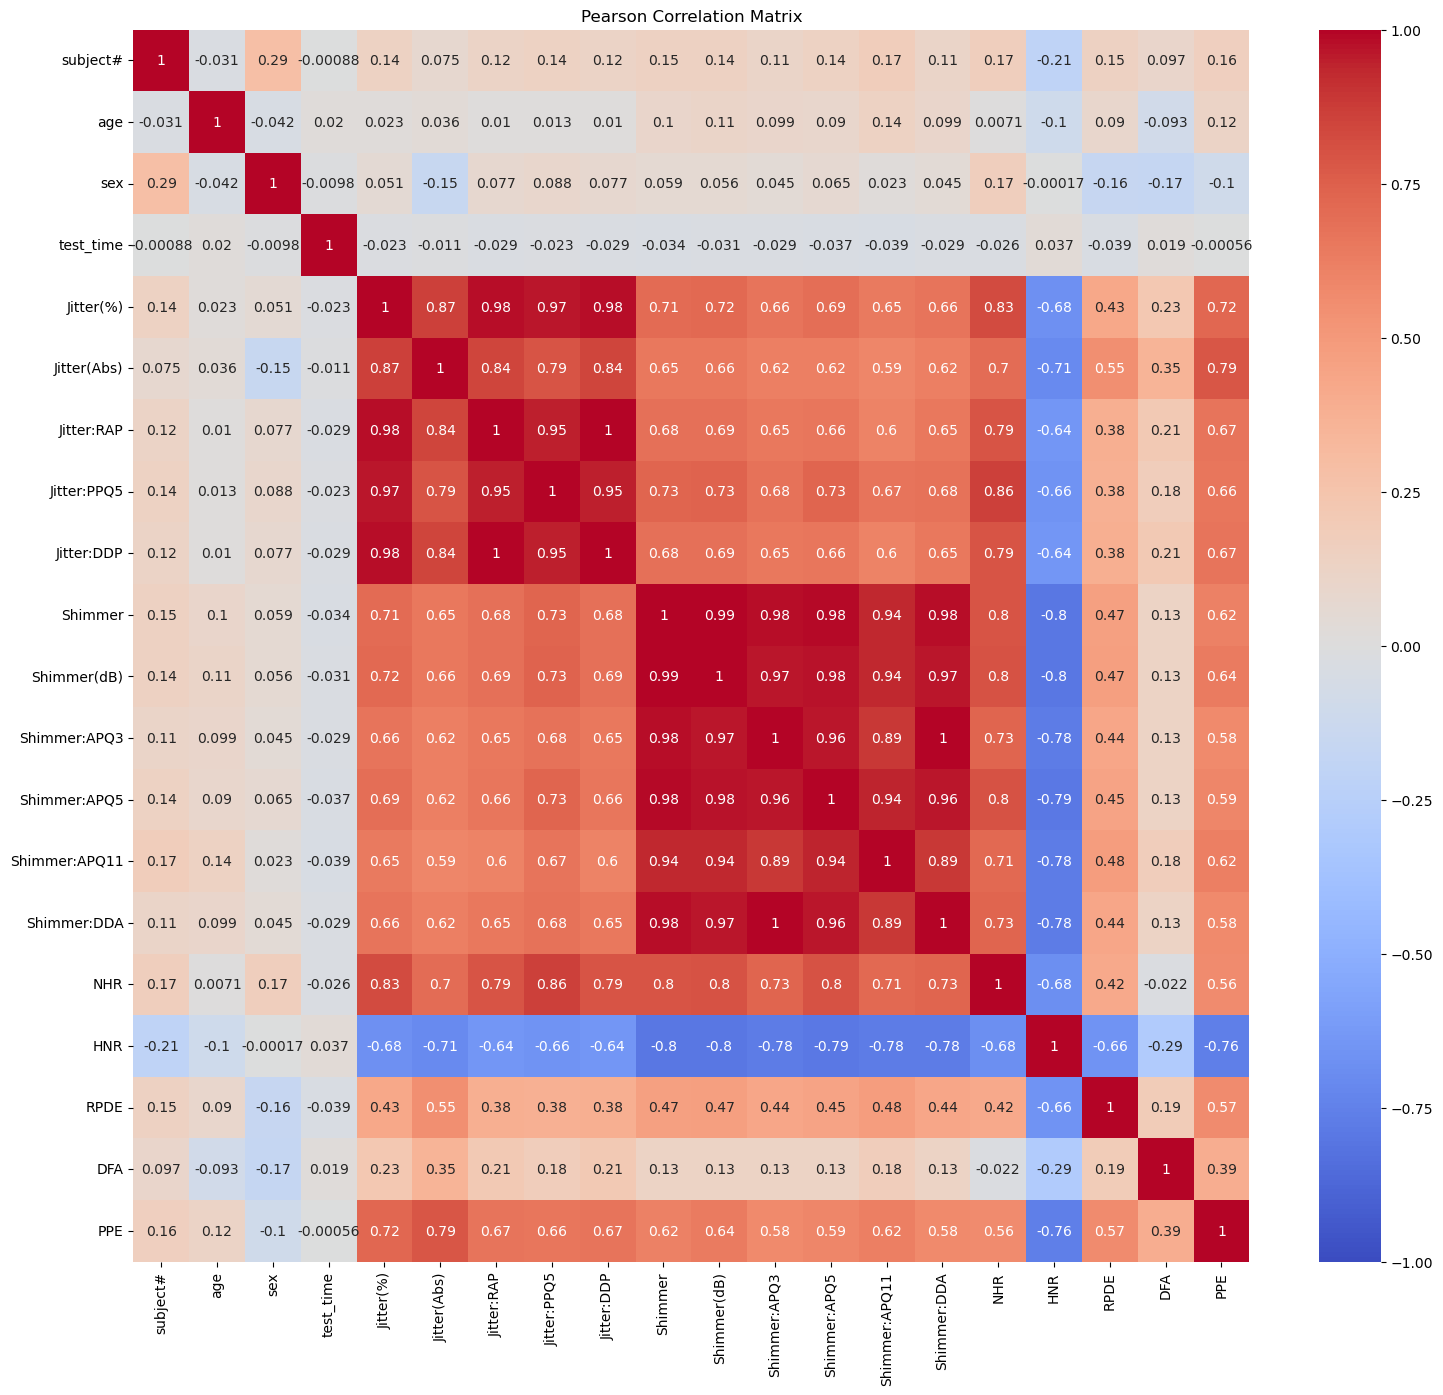

In [9]:
temp =df.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)

plt.figure(figsize=(18, 16))
correlation_matrix = temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.savefig('total_UPDRS.png', dpi=600, bbox_inches='tight')
plt.show()


In [10]:
# choose total_UPDRS as my target variable
y = df[['total_UPDRS']]
X = df.drop(['test_time','total_UPDRS','motor_UPDRS', 'Jitter:RAP', 'Shimmer:APQ3'], axis=1)
print(y.head(5))
print(X.head(5))
print(X.shape)

   total_UPDRS
0       34.398
1       34.894
2       35.389
3       35.810
4       36.375
   subject#  age  sex  Jitter(%)  Jitter(Abs)  Jitter:PPQ5  Jitter:DDP  \
0         1   72    0    0.00662     0.000034      0.00317     0.01204   
1         1   72    0    0.00300     0.000017      0.00150     0.00395   
2         1   72    0    0.00481     0.000025      0.00208     0.00616   
3         1   72    0    0.00528     0.000027      0.00264     0.00573   
4         1   72    0    0.00335     0.000020      0.00130     0.00278   

   Shimmer  Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR  \
0  0.02565        0.230       0.01309        0.01662      0.04314  0.014290   
1  0.02024        0.179       0.01072        0.01689      0.02982  0.011112   
2  0.01675        0.181       0.00844        0.01458      0.02202  0.020220   
3  0.02309        0.327       0.01265        0.01963      0.03317  0.027837   
4  0.01703        0.176       0.00929        0.01819      0.02036  0.0

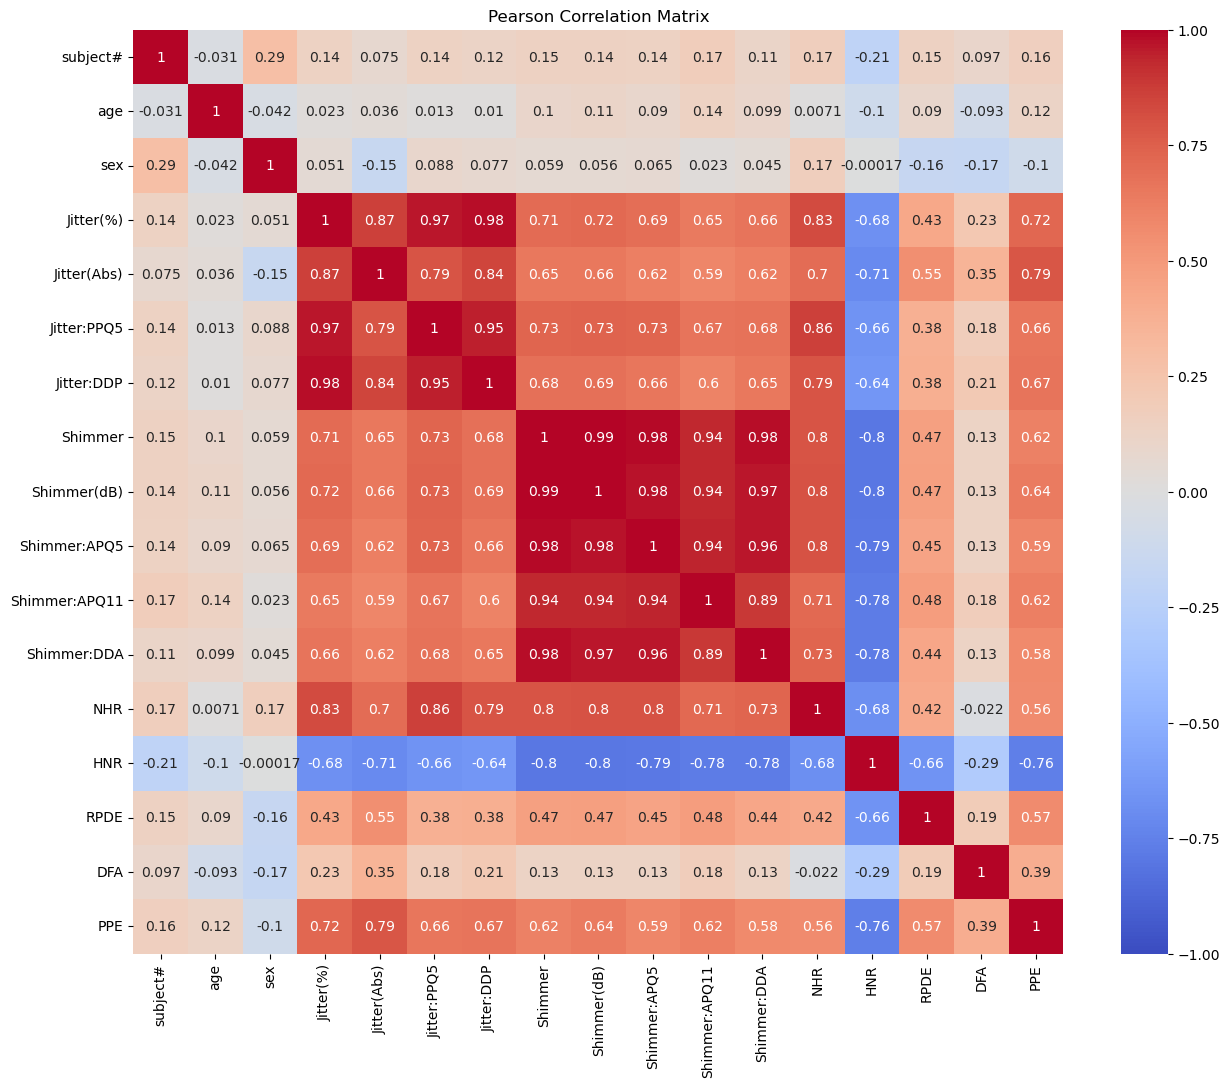

In [11]:
plt.figure(figsize=(15, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

groups = df['subject#']
# set out 20% of all data for the test set
splitter = GroupShuffleSplit(n_splits=1,test_size=0.2,random_state=2) 
for i_other, i_test in splitter.split(X, y, groups=groups): 
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]


         

#perform k fold split on the rest of data to get train & val
n=0
kfold = GroupKFold(n_splits=4)
for train_index, test_index in kfold.split(X_other, y_other, groups=groups_other):
    n=n+1
    X_train, X_val = X_other.iloc[train_index],  X_other.iloc[test_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[test_index]
    print("fold "+ str(n))
    print("TRAIN Index:", train_index, "TEST Index:", test_index)
    
    X_train_scaled=X_train.copy()
    X_val_scaled=X_val.copy()
    X_test_scaled=X_test.copy()
    
    scaler = StandardScaler()
    cols= ['Jitter(%)', 'Jitter(Abs)','Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ5','Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']     
    for col in cols:
        X_train_scaled[col]=scaler.fit_transform(pd.DataFrame(X_train[col]))
        X_val_scaled[col]=scaler.transform(pd.DataFrame(X_val[col]))
        X_test_scaled[col]=scaler.transform(pd.DataFrame(X_test[col]))
    
    scaler = MinMaxScaler()
    X_train_scaled['age'] = scaler.fit_transform(pd.DataFrame(X_train['age']))
    X_val_scaled['age'] = scaler.transform(pd.DataFrame(X_val['age']))
    X_test_scaled['age'] = scaler.transform(pd.DataFrame(X_test['age']))
    print("train:")
    print(X_train_scaled.head(5))
    print("test:")
    print(X_test_scaled.head(5))
    print("val:")
    print(X_val_scaled.head(5))


fold 1
TRAIN Index: [ 282  283  284 ... 4613 4614 4615] TEST Index: [   0    1    2 ... 4013 4014 4015]
train:
     subject#       age  sex  Jitter(%)  Jitter(Abs)  Jitter:PPQ5  Jitter:DDP  \
575         5  0.795918    0  -0.135840     0.155268    -0.087503   -0.225670   
576         5  0.795918    0  -0.297751    -0.335163    -0.341294   -0.417410   
577         5  0.795918    0  -0.197366    -0.153237    -0.066156   -0.120995   
578         5  0.795918    0  -0.130983     0.165616    -0.009230   -0.122952   
579         5  0.795918    0  -0.538997    -0.510833    -0.419566   -0.585671   

      Shimmer  Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
575  0.043998    -0.005417      0.109118      -0.077071     0.176934   
576  0.035332     0.200937      0.086161       0.275869     0.027198   
577 -0.277681    -0.301321     -0.224029      -0.360089    -0.157554   
578  0.433271     0.341102      0.443332       0.263027     0.682352   
579 -0.200034    -0.254599     -0.169038  